In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import nltk

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import LatentDirichletAllocation

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>


Creating a Pandas DataFrame from a CSV file<br><br></p>

In [10]:
data = pd.read_csv('data.csv')
data.head()

jobpost          date  \
0  AMERIA Investment Consulting Company\rJOB TITL...   Jan 5, 2004   
1  International Research & Exchanges Board (IREX...   Jan 7, 2004   
2  Caucasus Environmental NGO Network (CENN)\rJOB...   Jan 7, 2004   
3  Manoff Group\rJOB TITLE:  BCC Specialist\rPOSI...   Jan 7, 2004   
4  Yerevan Brandy Company\rJOB TITLE:  Software D...  Jan 10, 2004   

                                               Title  \
0                            Chief Financial Officer   
1  Full-time Community Connections Intern (paid i...   
2                                Country Coordinator   
3                                     BCC Specialist   
4                                 Software Developer   

                                           Company AnnouncementCode Term  \
0             AMERIA Investment Consulting Company              NaN  NaN   
1  International Research & Exchanges Board (IREX)              NaN  NaN   
2        Caucasus Environmental NGO Network (CENN)              NaN  NaN   
3                                     Manoff Group              NaN  NaN   
4                           Yerevan Brandy Company              NaN  NaN   

  Eligibility Audience StartDate                               Duration  \
0         NaN      NaN       NaN                                    NaN   
1         NaN      NaN       NaN                               3 months   
2         NaN      NaN       NaN  Renewable annual contract\r\nPOSITION   
3         NaN      NaN       NaN                                    NaN   
4         NaN      NaN       NaN                                    NaN   

   ...   Salary                                       ApplicationP  \
0  ...      NaN  To apply for this position, please submit a\r\...   
1  ...      NaN  Please submit a cover letter and resume to:\r\...   
2  ...      NaN  Please send resume or CV toursula.kazarian@......   
3  ...      NaN  Please send cover letter and resume to Amy\r\n...   
4  ...      NaN  Successful candidates should submit\r\n- CV; \...   

  OpeningDate                                       Deadline Notes  \
0         NaN                                26 January 2004   NaN   
1         NaN                                12 January 2004   NaN   
2         NaN  20 January 2004\r\nSTART DATE:  February 2004   NaN   
3         NaN      23 January 2004\r\nSTART DATE:  Immediate   NaN   
4         NaN                         20 January 2004, 18:00   NaN   

                                              AboutC Attach  Year Month     IT  
0                                                NaN    NaN  2004     1  False  
1  The International Research & Exchanges Board (...    NaN  2004     1  False  
2  The Caucasus Environmental NGO Network is a\r\...    NaN  2004     1  False  
3                                                NaN    NaN  2004     1  False  
4                                                NaN    NaN  2004     1   True  

[5 rows x 24 columns]

lets discover the dimensions of our data , rows and columns

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>


Data analysis <br><br></p>

In [22]:
df=['date','Year','Month']
data[df].head()

date  Year  Month
0   Jan 5, 2004  2004      1
1   Jan 7, 2004  2004      1
2   Jan 7, 2004  2004      1
3   Jan 7, 2004  2004      1
4  Jan 10, 2004  2004      1

from these first lines of our data, we can see missing data, as well as the date variable is redundant because we have two varaible which indicates the year and the month.
I'm not going to focus on these variables at the moment because the but is to classify the job descriptions.

In [21]:
data.shape

(19001, 25)

As we can see , we have 19001 rows and 24 variables .
Let's now check all the columns in the data , all the variables in our dataset

In [23]:
print(data['Title'].value_counts())

Accountant                                                           328
Chief Accountant                                                     219
Medical Representative                                               216
Sales Manager                                                        166
Administrative Assistant                                             155
Lawyer                                                               151
Software Developer                                                   134
Project Manager                                                      117
English Language Courses                                             109
Web Developer                                                        101
Java Developer                                                        88
Marketing Specialist                                                  87
Office Manager                                                        85
Receptionist/ Administrative Assistant             

So we can see the most title of jobs which exist in our data 

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>


Job Description text Analysis <br><br></p>

In [24]:
all_content = " ".join(a for a in data['jobpost'] )

print("Nombre de caractères dans tous les description: ",len(all_content))
print('\n')

Nombre de caractères dans tous les description:  50384699




In [25]:
#Tokenisation naïve sur les espaces entre les mots => on obtient une liste de mots
tokens = all_content.split()

#On transforme cette liste en objet nltk "Text" (objet chaine de caractère qui conserve la notion de tokens, et qui
#comprend  un certain nombre de méthodes utiles pour explorer les données.
text = nltk.Text(tokens)

#Comme par exemple "financial" : montre les occurences d'un mot dans son contexte
print("Exemples d'occurences du terme 'financial' :")
text.concordance("financial")
print('\n')



Exemples d'occurences du terme 'financial' :
Displaying 25 of 10574 matches:
                                   Financial Officer POSITION LOCATION: Yerevan
sulting Company is seeking a Chief Financial Officer. This position manages the
 level of technical proficiency in financial management and investment manageme
JOB RESPONSIBILITIES: - Supervises financial management and administrative staf
Directs and oversees the company's financial management activities, including e
cluding developing projections for financial planning, and preparing budgets; -
; - Prepares external and internal financial management reports, such as audite
anagement reports, such as audited financial statements, tax returns, and repor
ing; - Principles and practices of financial management and budgeting; - Princi
ing; - Principles and practices of financial systems design and analysis; - Pri
as needed; - Gather and synthesize financial information from a variety of sour
ariety of audiences with differing financia

In [27]:
# Analyse de la fréquence des termes d'intérêt
fdist = text.vocab()

print("Co-occurences fréquentes :")
text.collocations()
print('\n')
print("Nombre de mots :", len(tokens))
print('\n')
print("Nombre de mots uniques :",len(fdist.keys()))
print('\n')
print("Nombre de mots uniques v2 :",len(set(tokens)))

#100 tokens les plus fréquents 
top100_items = sorted(fdist.items(),key=lambda x: x[1],reverse=True)[:100]
#sans les fréquences
top100 = [t[0] for t in top100_items]
print("Top 100 :", top100)
#print('\n')


Co-occurences fréquentes :
www.careercenter.am, Thanks.; Career Center; Announcement" link.; free
posting; REQUIRED QUALIFICATIONS:; OPENING DATE:; career-related
opportunities; Thanks. OPENING; opportunities available; Please
clearly; LOCATION: Yerevan,; application letter; APPLICATION
DEADLINE:; APPLICATION PROCEDURES:; JOB DESCRIPTION:;
www.careercenter.am website; clearly mention; Yerevan, Armenia; job
opportunity; JOB RESPONSIBILITIES:


Nombre de mots : 7142593


Nombre de mots uniques : 97448


Nombre de mots uniques v2 : 97448
Top 100 : ['and', '-', 'the', 'of', 'in', 'to', 'for', 'a', 'with', 'your', 'or', 'is', 'mention', 'job', 'website', 'APPLICATION', 'JOB', 'other', 'an', 'be', 'will', 'Armenia', 'that', 'Please', 'as', 'on', 'you', 'work', 'this', 'knowledge', 'application', 'its', 'The', 'experience', 'through', 'To', 'letter', 'Center', 'Career', 'clearly', 'opportunities', 'English', 'available', 'opportunity', 'follow', 'are', 'place', 'Yerevan,', 'free', 'candidates

the most frequent words are not significant and do not give us the information on the domains which are found in our data, on is found with the words which have no information like the (the, me, by ..) for that we will remove them, we will import the 'stopwords' to remove the most frequent terms that are in the library nltk and punctuation strings also the string library

In [28]:
nltk.download('stopwords')
import string
string.punctuation
useless_words = nltk.corpus.stopwords.words("english") + list(string.punctuation)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\latif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
top100_filtered = [w for w in top100 if w.lower() \
                         not in useless_words]
print("Top 100 sans les mots fréquents \n :", top100_filtered)
print('\n')

Top 100 sans les mots fréquents 
 : ['mention', 'job', 'website', 'APPLICATION', 'JOB', 'Armenia', 'Please', 'work', 'knowledge', 'application', 'experience', 'letter', 'Center', 'Career', 'clearly', 'opportunities', 'English', 'available', 'opportunity', 'follow', 'place', 'Yerevan,', 'free', 'candidates', 'organization,', 'learned', 'posting', 'TITLE:', '----------------------------------', 'Thanks.', 'URL', 'LOCATION:', 'DESCRIPTION:', 'DEADLINE:', 'www.careercenter.am,', 'PROCEDURES:', 'career-related', 'www.careercenter.am', 'go', 'link.', '"Post', 'Announcement"', 'QUALIFICATIONS:', 'REQUIRED', 'DATE:', 'OPENING', 'skills;', 'Ability', 'RESPONSIBILITIES:', 'development', 'Excellent', 'Knowledge', 'Armenian', 'COMPANY:', 'years', 'to:', 'position', 'Good', 'DURATION:', 'related', 'Russian', 'communication', 'subject', 'management', 'skills', 'START', 'DATE/', 'TIME:', 'REMUNERATION/']




In [31]:
#la fréquence des 200 mots premiers dans tous les jobpost 
for rank, word in enumerate(sorted(fdist.items(),key=lambda x: x[1],reverse=True)):
        print(rank, word)
        if rank > 200:
            print("....")
            break

0 ('and', 333348)
1 ('-', 308789)
2 ('the', 260409)
3 ('of', 234180)
4 ('in', 171541)
5 ('to', 132133)
6 ('for', 82723)
7 ('a', 81797)
8 ('with', 59180)
9 ('your', 52678)
10 ('or', 47912)
11 ('is', 44829)
12 ('mention', 41570)
13 ('job', 39128)
14 ('website', 38799)
15 ('APPLICATION', 37879)
16 ('JOB', 35124)
17 ('other', 34104)
18 ('an', 33772)
19 ('be', 33230)
20 ('will', 31890)
21 ('Armenia', 31168)
22 ('that', 28709)
23 ('Please', 28507)
24 ('as', 28057)
25 ('on', 27883)
26 ('you', 26557)
27 ('work', 25561)
28 ('this', 24683)
29 ('knowledge', 24354)
30 ('application', 23982)
31 ('its', 23619)
32 ('The', 23561)
33 ('experience', 23520)
34 ('through', 23164)
35 ('To', 22834)
36 ('letter', 22741)
37 ('Center', 21925)
38 ('Career', 20538)
39 ('clearly', 20509)
40 ('opportunities', 20182)
41 ('English', 19986)
42 ('available', 19824)
43 ('opportunity', 19817)
44 ('follow', 19790)
45 ('are', 19539)
46 ('place', 19496)
47 ('Yerevan,', 19485)
48 ('free', 19416)
49 ('candidates', 19268)
50 

In [ ]:
text.vocab().get("data")#4659
text.vocab().get("financial")#8942
text.vocab().get("marketing")#3554
text.vocab().get("computer")#4104
text.vocab().get("medical")#2210
text.vocab().get("Engineer")#2412
text.vocab().get("business")#7266
text.vocab().get("technical")#8014

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>


job description Classification <br><br></p>

In [11]:
# components for features reduction
n_components = 5

# number of clusters we want
n_clusters = 5

# covert words into TFIDF metrics
tfidf = TfidfVectorizer(stop_words = 'english')
X_text = tfidf.fit_transform(data['jobpost'])

# reduction de dimension
svd = TruncatedSVD(n_components=n_components, random_state = 0)
X_2d = svd.fit_transform(X_text)

# fit k-mean clustering
kmeans = KMeans(n_clusters=n_clusters, random_state = 0)

# predict our clusters nX_clustered = kmeans.fit_predict(X_2d)

# display by groups
df_plot = pd.DataFrame(list(X_2d), list(X_clustered))
df_plot = df_plot.reset_index()
df_plot.rename(columns = {'index': 'Cluster'}, inplace = True)
df_plot['Cluster'] = df_plot['Cluster'].astype(int)

print(df_plot.head())

print(df_plot.groupby('Cluster').agg({'Cluster': 'count'}))# make a column for color by clusters
col = df_plot['Cluster'].map({0:'b', 1:'r', 2: 'g', 3:'purple', 4:'gold'})

# variable for first n dimensions we want to plot
n = 5

# visualize the clusters by first n dimensions (reduced)
fig, ax = plt.subplots(n, n, sharex=True, sharey=True, figsize=(15,15))
fig.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

# plot it
k = 0
for i in range(0,n):
    for j in range(0,n):
        if i != j:
            df_plot.plot(kind = 'scatter', x=j, y=i, c=col, ax = ax[i][j], fontsize = 18)
        else:
            ax[i][j].set_xlabel(i)
            ax[i][j].set_ylabel(j)
            ax[i][j].set_frame_on(False)
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        
plt.suptitle('2D clustering view of the first {} components'.format(n), fontsize = 20)
fig.text(0.5, 0.01, 'Component n', ha='center', fontsize = 18)
fig.text(0.01, 0.5, 'Component n', va='center', rotation='vertical', fontsize = 18)

   Cluster         0         1         2         3         4
0        1  0.315904 -0.186414  0.266256  0.104014 -0.120060
1        4  0.183479 -0.055322 -0.021263  0.117442  0.112475
2        4  0.159125 -0.037882 -0.014335  0.100987  0.066283
3        4  0.167310  0.013706 -0.009205  0.163577 -0.014664
4        0  0.241955  0.106425  0.028491 -0.017741  0.055758
         Cluster
Cluster         
0           7374
1           2597
2           3402
3           2247
4           3381


Text(0.01,0.5,'Component n')

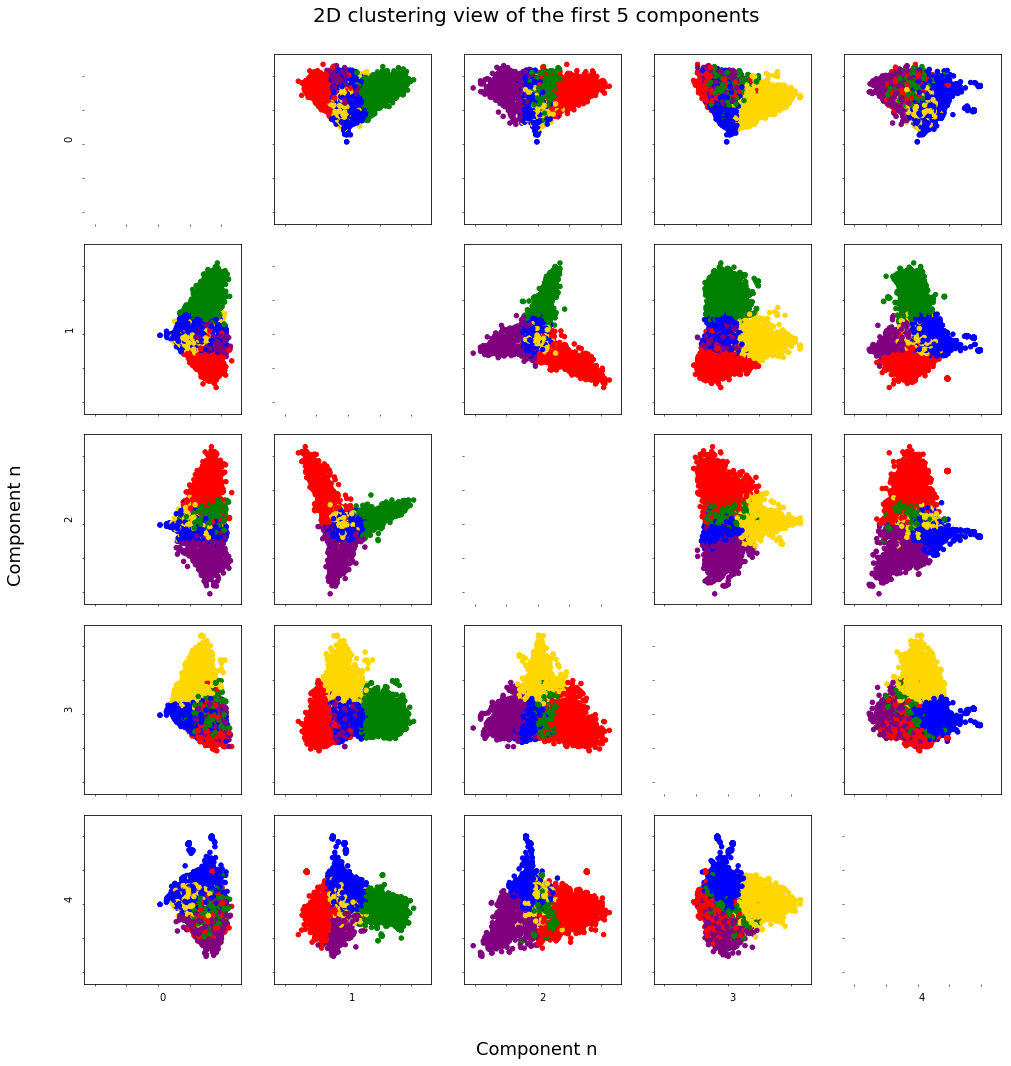

In [12]:
# make a column for color by clusters
col = df_plot['Cluster'].map({0:'b', 1:'r', 2: 'g', 3:'purple', 4:'gold'})

# variable for first n dimensions we want to plot
n = 5

# visualize the clusters by first n dimensions (reduced)
fig, ax = plt.subplots(n, n, sharex=True, sharey=True, figsize=(15,15))
fig.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

# plot it
k = 0
for i in range(0,n):
    for j in range(0,n):
        if i != j:
            df_plot.plot(kind = 'scatter', x=j, y=i, c=col, ax = ax[i][j], fontsize = 18)
        else:
            ax[i][j].set_xlabel(i)
            ax[i][j].set_ylabel(j)
            ax[i][j].set_frame_on(False)
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        
plt.suptitle('2D clustering view of the first {} components'.format(n), fontsize = 20)
fig.text(0.5, 0.01, 'Component n', ha='center', fontsize = 18)
fig.text(0.01, 0.5, 'Component n', va='center', rotation='vertical', fontsize = 18)

In [17]:
# Logistic Regression approach

data['Cluster'] = df_plot['Cluster']

# function for finding most significant words for each cluster
def generate_text(cluster):
    
    df_s = data['jobpost']
    y = data['Cluster'].map(lambda x: 1 if x == cluster else 0)
    count = len(df_s)
    
    tfidf = TfidfVectorizer(stop_words = 'english')
    X = tfidf.fit_transform(df_s)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    clf = LogisticRegression(random_state = 0).fit(X_train, y_train)
    clf_d = DummyClassifier().fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    acc_d = clf_d.score(X_test, y_test)
    coef = clf.coef_.tolist()[0]
    w = tfidf.get_feature_names()
    coeff_df = pd.DataFrame({'words' : w, 'score' : coef})
    coeff_df = coeff_df.sort_values(['score', 'words'], ascending=[0, 1])
    coeff_df = coeff_df[:30]
    d = coeff_df.set_index('words')['score'].to_dict()
    return d, acc, acc_d

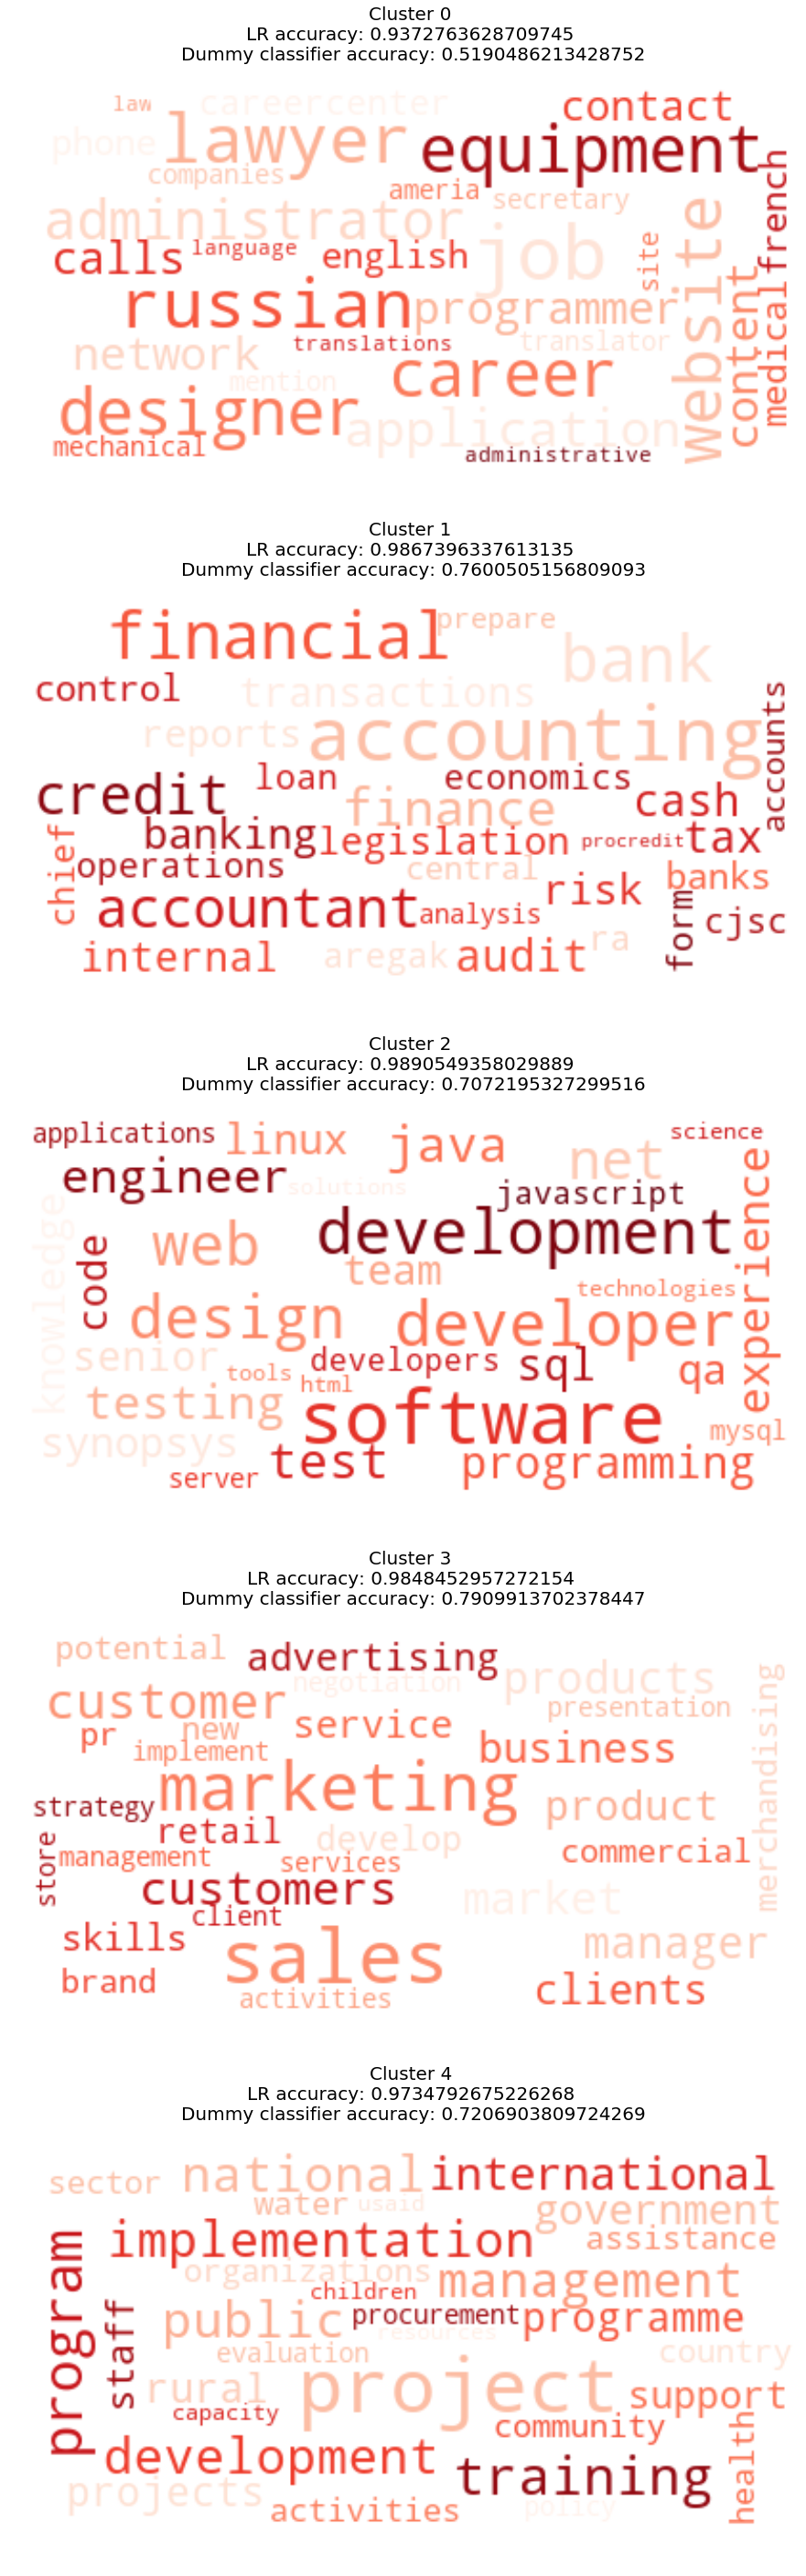

In [19]:
# visualized it by word clouds
from wordcloud import WordCloud

fig, ax = plt.subplots(n_clusters, sharex=True, figsize=(15,10*n_clusters))

for i in range(0, n_clusters):
    d, acc, acc_d = generate_text(i)
    wordcloud = WordCloud(max_font_size=40, collocations=False, colormap = 'Reds', background_color = 'white').fit_words(d)
    ax[i].imshow(wordcloud, interpolation='bilinear')
    ax[i].set_title('Cluster {} \nLR accuracy: {} \nDummy classifier accuracy: {}'.format(i, acc, acc_d), fontsize = 20)
    ax[i].axis("off")

In [20]:
no_topics = 5

c = CountVectorizer(stop_words='english')
X_text_c = c.fit_transform(data['jobpost'])

lda = LatentDirichletAllocation(learning_method = 'online', n_components=no_topics, random_state=0).fit(X_text_c)
X_text_c_feature_names = c.get_feature_names()

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, X_text_c_feature_names, no_top_words)

Topic 0:
job application www mention website careercenter knowledge career skills armenia
Topic 1:
project development armenia management job experience work skills activities support
Topic 2:
sales job marketing application www company career website mention armenia
Topic 3:
job application experience knowledge software development www mention website career
Topic 4:
application www english career form center armenia careercenter language website
